In [82]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# 2013-2014 data

Hepatitis1 = pd.read_sas("2013-2014 data\HEQ_H.XPT")
AlcoholUse1 = pd.read_sas("2013-2014 data\ALQ_H.XPT")
CurrentHealthStatus1 = pd.read_sas("2013-2014 data\HSQ_H.XPT")
Immunization1 = pd.read_sas("2013-2014 data\IMQ_H.XPT")
MedicalConditions1 = pd.read_sas("2013-2014 data\MCQ_H.XPT")
SmokingCigaretteUse1 = pd.read_sas("2013-2014 data\SMQ_H.XPT")
BloodPressure1 = pd.read_sas("2013-2014 data\BPX_H.XPT")
BodyMeasures1 = pd.read_sas("2013-2014 data\BMX_H.XPT")
HepatitisBcore1 = pd.read_sas("2013-2014 data\HEPBD_H.XPT")
HepatitisBsurface1 = pd.read_sas("2013-2014 data\HEPB_S_H.XPT")
HepatitisC1 = pd.read_sas("2013-2014 data\HEPC_H.XPT")

In [68]:
from functools import reduce
data_merge1 = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["SEQN"]),
                     [AlcoholUse1, CurrentHealthStatus1,  Hepatitis1,Immunization1,MedicalConditions1,SmokingCigaretteUse1,
                     BloodPressure1, BodyMeasures1, HepatitisBcore1, HepatitisBsurface1, HepatitisC1])
data_merge1

,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,...,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,LBXHBC,LBDHBG,LBDHD,LBXHBS,LBXHCR,LBXHCG
0,73557.0,1.0,NaN,1.000000e+00,3.0,1.0,5.397605e-79,NaN,1.0,NaN,...,NaN,NaN,20.6,NaN,1.0,2.0,2.0,1.0,3.0,NaN
1,73558.0,1.0,NaN,7.000000e+00,1.0,4.0,2.000000e+00,1.0,1.0,5.397605e-79,...,NaN,NaN,24.4,NaN,2.0,2.0,2.0,2.0,3.0,NaN
2,73559.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,25.6,NaN,2.0,2.0,2.0,2.0,3.0,NaN
3,73561.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,3.0,NaN
4,73562.0,1.0,NaN,5.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,5.397605e-79,...,29.0,29.1,29.1,NaN,2.0,2.0,2.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,83723.0,1.0,NaN,3.000000e+00,3.0,2.0,5.397605e-79,NaN,1.0,NaN,...,NaN,NaN,24.7,NaN,2.0,2.0,2.0,2.0,3.0,NaN
5920,83724.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,20.9,NaN,2.0,2.0,2.0,2.0,3.0,NaN
5921,83726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5922,83727.0,1.0,NaN,1.000000e+00,2.0,3.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,19.1,NaN,2.0,2.0,2.0,2.0,3.0,NaN


In [69]:
# 2015-2016 data

Hepatitis2 = pd.read_sas("2015-2016 data\HEQ_I.XPT")
AlcoholUse2 = pd.read_sas("2015-2016 data\ALQ_I.XPT")
CurrentHealthStatus2 = pd.read_sas("2015-2016 data\HSQ_I.XPT")
Immunization2 = pd.read_sas("2015-2016 data\IMQ_I.XPT")
MedicalConditions2 = pd.read_sas("2015-2016 data\MCQ_I.XPT")
SmokingCigaretteUse2 = pd.read_sas("2015-2016 data\SMQ_I.XPT")
BloodPressure2 = pd.read_sas("2015-2016 data\BPX_I.XPT")
BodyMeasures2 = pd.read_sas("2015-2016 data\BMX_I.XPT")
HepatitisBcore2 = pd.read_sas("2015-2016 data\HEPBD_I.XPT")
HepatitisBsurface2 = pd.read_sas("2015-2016 data\HEPB_S_I.XPT")
HepatitisC2 = pd.read_sas("2015-2016 data\HEPC_I.XPT")

In [70]:
from functools import reduce
data_merge2 = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["SEQN"]),
                     [AlcoholUse2, CurrentHealthStatus2,  Hepatitis2,Immunization2,MedicalConditions2,SmokingCigaretteUse2,
                     BloodPressure2, BodyMeasures2, HepatitisBcore2, HepatitisBsurface2, HepatitisC2])
data_merge2

,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,...,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,LBXHBC,LBDHBG,LBDHD,LBXHBS,LBXHCR,LBXHCG
0,83732.0,1.0,NaN,1.000000e+00,2.0,1.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,22.8,NaN,2.0,NaN,NaN,2.0,3.0,NaN
1,83733.0,1.0,NaN,7.000000e+00,1.0,6.0,7.000000e+00,1.0,1.0,5.397605e-79,...,NaN,NaN,27.3,NaN,2.0,NaN,NaN,2.0,3.0,NaN
2,83734.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,26.6,NaN,2.0,NaN,NaN,2.0,3.0,NaN
3,83735.0,2.0,1.0,3.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,25.1,NaN,2.0,NaN,NaN,2.0,3.0,NaN
4,83736.0,2.0,1.0,1.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.1,NaN,2.0,NaN,NaN,2.0,3.0,NaN
5731,93696.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5732,93697.0,1.0,NaN,2.000000e+00,1.0,1.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,3.0,NaN
5733,93700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.8,NaN,2.0,NaN,NaN,1.0,3.0,NaN


In [71]:
# Find columns that are similar across all year periods

similar_columns = sorted(list(set(data_merge1.columns).intersection(set(data_merge2.columns))))

In [72]:
# Use columns similar across all year periods

data_20132014 = data_merge1[similar_columns]
data_20132014.insert(0, 'SEQN', data_20132014.pop('SEQN'))

data_20152016 = data_merge2[similar_columns]
data_20152016.insert(0, 'SEQN', data_20152016.pop('SEQN'))

C:\Users\Hayden\AppData\Local\Temp\ipykernel_15460\642654299.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_20132014.insert(0, 'SEQN', data_20132014.pop('SEQN'))
C:\Users\Hayden\AppData\Local\Temp\ipykernel_15460\642654299.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_20152016.insert(0, 'SEQN', data_20152016.pop('SEQN'))


In [73]:
# Concatenate the datasets

data_total = pd.concat([data_20132014, data_20152016])

data_total

,SEQN,AGQ030,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,...,SMQ621,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U
0,73557.0,NaN,1.0,NaN,1.000000e+00,3.0,1.0,5.397605e-79,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558.0,2.0,1.0,NaN,7.000000e+00,1.0,4.0,2.000000e+00,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,73559.0,NaN,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73561.0,NaN,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73562.0,NaN,1.0,NaN,5.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5731,93696.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5732,93697.0,1.0,1.0,NaN,2.000000e+00,1.0,1.0,5.397605e-79,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5733,93700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [74]:
# HEQ010 1.0 or HEQ030 1.0 (has hepatitis) new column

data_total['HEQ'] = np.where(((data_total.HEQ010 == 1.0) | ((data_total.HEQ030 == 1.0))), 1.0, 2.0)

data_total['HEQ'].value_counts()

C:\Users\Hayden\AppData\Local\Temp\ipykernel_15460\902758013.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_total['HEQ'] = np.where(((data_total.HEQ010 == 1.0) | ((data_total.HEQ030 == 1.0))), 1.0, 2.0)


2.0    11377
1.0      282
Name: HEQ, dtype: int64

In [75]:
# HEQ020 1.0 or HEQ040 1.0 (took meds for hepatitis) new column

data_total['MEDS'] = np.where(((data_total.HEQ020 == 1.0) | ((data_total.HEQ040 == 1.0))), 1.0, 2.0)

data_total['MEDS'].value_counts()

C:\Users\Hayden\AppData\Local\Temp\ipykernel_15460\2953928234.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_total['MEDS'] = np.where(((data_total.HEQ020 == 1.0) | ((data_total.HEQ040 == 1.0))), 1.0, 2.0)


2.0    11584
1.0       75
Name: MEDS, dtype: int64

In [76]:
# Drop HEQ columns as we have combined them

data_total = data_total.drop(['HEQ010', 'HEQ020', 'HEQ030', 'HEQ040'], axis = 1)

In [77]:
data_total

,SEQN,AGQ030,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,...,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,HEQ,MEDS
0,73557.0,NaN,1.0,NaN,1.000000e+00,3.0,1.0,5.397605e-79,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,73558.0,2.0,1.0,NaN,7.000000e+00,1.0,4.0,2.000000e+00,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
2,73559.0,NaN,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,73561.0,NaN,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
4,73562.0,NaN,1.0,NaN,5.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
5731,93696.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
5732,93697.0,1.0,1.0,NaN,2.000000e+00,1.0,1.0,5.397605e-79,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
5733,93700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0


In [170]:
# Missing values

percentage_missing = data_total.isnull().mean() * 100
percentage_missing = percentage_missing[percentage_missing != 0].sort_values(ascending = False)

number_missing = data_total.isnull().sum()
number_missing = number_missing[number_missing != 0].sort_values(ascending = False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentage_missing)

BPXCHR      100.000000
BMIHEAD     100.000000
MCQ240R     100.000000
BMXRECUM    100.000000
BMXHEAD     100.000000
MCQ240I     100.000000
MCQ149      100.000000
MCQ151      100.000000
BMIRECUM    100.000000
SMQ665B     100.000000
SMQ665D     100.000000
SMQ665A     100.000000
SMD630      100.000000
SMQ665C     100.000000
SMQ621      100.000000
SMQ661      100.000000
MCQ240V      99.982846
MCQ230D      99.982846
MCQ240Y      99.974269
MCQ240C      99.974269
MCQ240D      99.974269
MCQ240H      99.965692
MCQ240K      99.965692
MCQ240DK     99.957115
MCQ240T      99.948538
MCQ240B      99.948538
MCQ240AA     99.939961
MCQ240Z      99.939961
MCQ240Q      99.931383
MCQ240M      99.905652
MCQ230C      99.897075
MCQ240L      99.845613
MCQ240J      99.837036
MCQ240O      99.819882
MCQ240BB     99.802728
MCQ240S      99.734111
MCQ240A      99.716957
MCQ240N      99.699803
MCQ240CC     99.588301
MCQ240F      99.519684
MCQ240G      99.476799
MCQ240DD     99.468222
MCQ240P      99.288104
MCQ240X    

In [171]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(number_missing)

BPXCHR      11659
BMIHEAD     11659
MCQ240R     11659
BMXRECUM    11659
BMXHEAD     11659
MCQ240I     11659
MCQ149      11659
MCQ151      11659
BMIRECUM    11659
SMQ665B     11659
SMQ665D     11659
SMQ665A     11659
SMD630      11659
SMQ665C     11659
SMQ621      11659
SMQ661      11659
MCQ240V     11657
MCQ230D     11657
MCQ240Y     11656
MCQ240C     11656
MCQ240D     11656
MCQ240H     11655
MCQ240K     11655
MCQ240DK    11654
MCQ240T     11653
MCQ240B     11653
MCQ240AA    11652
MCQ240Z     11652
MCQ240Q     11651
MCQ240M     11648
MCQ230C     11647
MCQ240L     11641
MCQ240J     11640
MCQ240O     11638
MCQ240BB    11636
MCQ240S     11628
MCQ240A     11626
MCQ240N     11624
MCQ240CC    11611
MCQ240F     11603
MCQ240G     11598
MCQ240DD    11597
MCQ240P     11576
MCQ240X     11551
LBXHCG      11542
MCQ230B     11536
MCQ240U     11499
MCQ240W     11478
MCQ240E     11477
MCQ180G     11444
MCQ180D     11399
BMIHT       11392
MCQ206      11368
PEASCCT1    11286
MCQ180B     11284
MCQ180F   

In [158]:
# EDA

hasHephasLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 1.0) & (data_total['MCQ160L'] == 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 1.0)]
    ) * 100
hasHephasNoLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 1.0) & (data_total['MCQ160L'] != 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 1.0)]
    ) * 100

hasNoHephasLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 2.0) & (data_total['MCQ160L'] == 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 2.0)]
    ) * 100
hasNoHephasNoLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 2.0) & (data_total['MCQ160L'] != 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 2.0)]
    ) * 100

hepatitis_liver_data = {
    'Has hepatitis': [hasHephasLiverCondition, hasHephasNoLiverCondition, hasHephasLiverCondition + hasHephasNoLiverCondition],
    'Does not have hepatitis': [hasNoHephasLiverCondition, hasNoHephasNoLiverCondition, hasNoHephasLiverCondition + hasNoHephasNoLiverCondition]
}

hepatitis_liver_table = pd.DataFrame(data = hepatitis_liver_data)
hepatitis_liver_table.index = ['Has liver condition', 'Does not have liver condition', 'Total']
hepatitis_liver_table

,Has hepatitis,Does not have hepatitis
Has liver condition,52.48227,2.87422
Does not have liver condition,47.51773,97.12578
Total,100.00000,100.00000


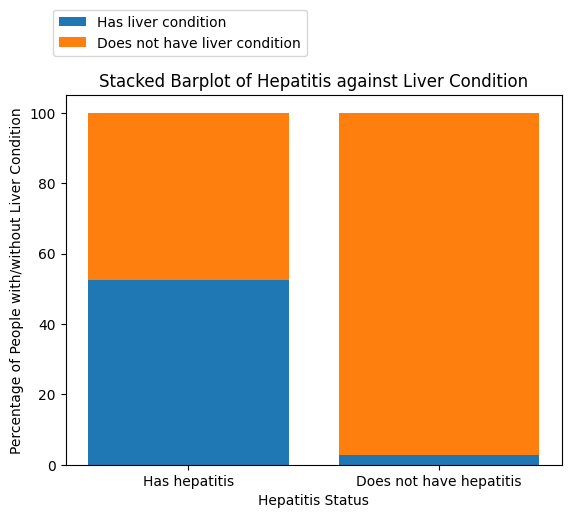

In [151]:
# EDA

plt.bar([1, 2], [hasHephasLiverCondition, hasNoHephasLiverCondition])
plt.bar([1, 2], [hasHephasNoLiverCondition, hasNoHephasNoLiverCondition], bottom = [hasHephasLiverCondition, hasNoHephasLiverCondition])
plt.xticks([1, 2], ['Has hepatitis', 'Does not have hepatitis'])
plt.legend(['Has liver condition', 'Does not have liver condition'], bbox_to_anchor = (0.5, 1.25))
plt.xlabel("Hepatitis Status")
plt.ylabel("Percentage of People with/without Liver Condition")
plt.title("Stacked Barplot of Hepatitis against Liver Condition")
plt.show()